# Thêm các thư viện

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file catada.txt

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/MHUD/
data = pd.read_csv('cadata.txt', header=None, delim_whitespace=True, encoding='latin1')

Mounted at /content/drive/
/content/drive/MyDrive/MHUD


# Đặt tên cho các cột theo mô tả từ dataset

In [6]:
column_names = [
    'Median House Value', 'Median Income', 'Housing Median Age',
    'Total Rooms', 'Total Bedrooms', 'Population', 'Households',
    'Latitude', 'Longitude'
]
data.columns = column_names
data.head()

,Median House Value,Median Income,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Latitude,Longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


# **Xáo trộn dữ liệu**

In [7]:
data_shuffled = data.sample(n=len(data), random_state=3)
data_shuffled

,Median House Value,Median Income,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Latitude,Longitude
9491,118800.0,3.5917,22.0,1542.0,291.0,821.0,285.0,39.21,-123.19
11843,118800.0,2.9559,15.0,1666.0,351.0,816.0,316.0,39.96,-120.93
11271,213300.0,3.2857,21.0,2695.0,707.0,1888.0,683.0,33.79,-117.99
19219,190300.0,3.0568,19.0,1848.0,428.0,1130.0,433.0,38.47,-122.67
14356,159800.0,3.3456,11.0,4304.0,1245.0,1960.0,1105.0,32.75,-117.23
...,...,...,...,...,...,...,...,...,...
6400,218300.0,3.7350,23.0,3264.0,729.0,1475.0,668.0,34.13,-118.05
15288,500001.0,3.5341,15.0,2392.0,446.0,747.0,421.0,33.10,-117.31
11513,485000.0,4.9044,24.0,1240.0,296.0,513.0,254.0,33.72,-118.07
1688,218600.0,6.0289,23.0,3455.0,479.0,1375.0,474.0,37.98,-122.27


# Kiểm tra các giá trị null

In [8]:
data_shuffled.info()
# dữ liệu không tồn tại giá trị null

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 9491 to 5994
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median House Value  20640 non-null  float64
 1   Median Income       20640 non-null  float64
 2   Housing Median Age  20640 non-null  float64
 3   Total Rooms         20640 non-null  float64
 4   Total Bedrooms      20640 non-null  float64
 5   Population          20640 non-null  float64
 6   Households          20640 non-null  float64
 7   Latitude            20640 non-null  float64
 8   Longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


# **Đưa giá trị cần dự đoán về cuối bảng**

In [9]:
data_final = data_shuffled[['Median Income',	'Housing Median Age',	'Total Rooms',	'Total Bedrooms',	'Population',	'Households',	'Latitude',	'Longitude', 'Median House Value']]
data_final

,Median Income,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Latitude,Longitude,Median House Value
9491,3.5917,22.0,1542.0,291.0,821.0,285.0,39.21,-123.19,118800.0
11843,2.9559,15.0,1666.0,351.0,816.0,316.0,39.96,-120.93,118800.0
11271,3.2857,21.0,2695.0,707.0,1888.0,683.0,33.79,-117.99,213300.0
19219,3.0568,19.0,1848.0,428.0,1130.0,433.0,38.47,-122.67,190300.0
14356,3.3456,11.0,4304.0,1245.0,1960.0,1105.0,32.75,-117.23,159800.0
...,...,...,...,...,...,...,...,...,...
6400,3.7350,23.0,3264.0,729.0,1475.0,668.0,34.13,-118.05,218300.0
15288,3.5341,15.0,2392.0,446.0,747.0,421.0,33.10,-117.31,500001.0
11513,4.9044,24.0,1240.0,296.0,513.0,254.0,33.72,-118.07,485000.0
1688,6.0289,23.0,3455.0,479.0,1375.0,474.0,37.98,-122.27,218600.0


Dữ liệu đã cho không có giá trị null

# Chia dữ liệu thành tập train và test

In [10]:
from sklearn.model_selection import train_test_split

X = data_final.drop(['Median House Value'], axis=1)
y = data_final['Median House Value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# **Tệp dữ liệu huấn luyện**

In [12]:
train_data = X_train.join(y_train)

In [13]:
train_data

,Median Income,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Latitude,Longitude,Median House Value
12579,1.8689,25.0,3087.0,720.0,2529.0,708.0,38.52,-121.41,66800.0
12915,6.6238,17.0,992.0,151.0,316.0,159.0,38.61,-121.31,326700.0
15112,4.7717,19.0,2121.0,341.0,1236.0,353.0,32.86,-116.98,153200.0
14660,4.4886,34.0,1748.0,294.0,800.0,294.0,32.81,-117.14,179100.0
6450,6.5989,44.0,2007.0,288.0,921.0,307.0,34.12,-118.04,500001.0
...,...,...,...,...,...,...,...,...,...
10867,3.4835,17.0,5122.0,1544.0,2966.0,1339.0,33.70,-117.88,116700.0
7341,2.6300,29.0,1846.0,530.0,2576.0,528.0,33.97,-118.14,156000.0
20030,3.2500,19.0,2471.0,431.0,1040.0,426.0,36.08,-119.03,80600.0
3054,1.9362,33.0,2143.0,488.0,1732.0,509.0,35.60,-119.34,59000.0


# Biểu đồ phân phối của các biến trong dữ liệu huấn luyện

array([[<Axes: title={'center': 'Median Income'}>,
        <Axes: title={'center': 'Housing Median Age'}>,
        <Axes: title={'center': 'Total Rooms'}>],
       [<Axes: title={'center': 'Total Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Median House Value'}>]], dtype=object)

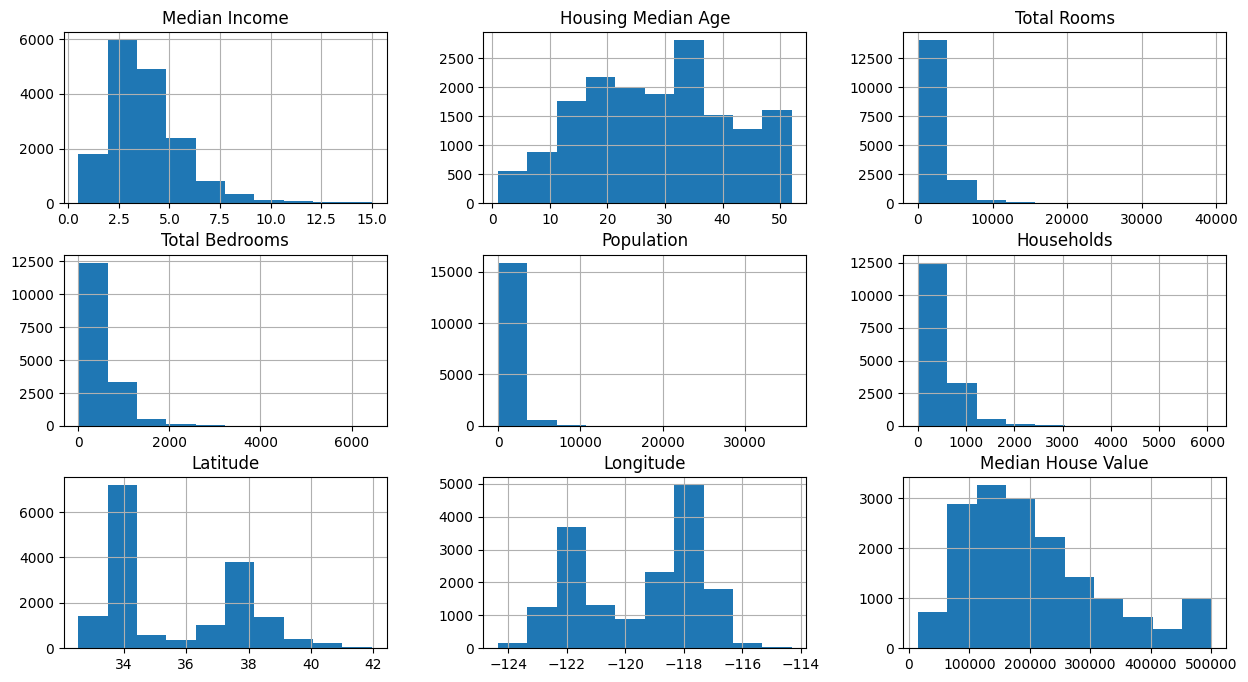

In [14]:
train_data.hist(figsize=(15, 8))

# Ma trận tương quan

<Axes: >

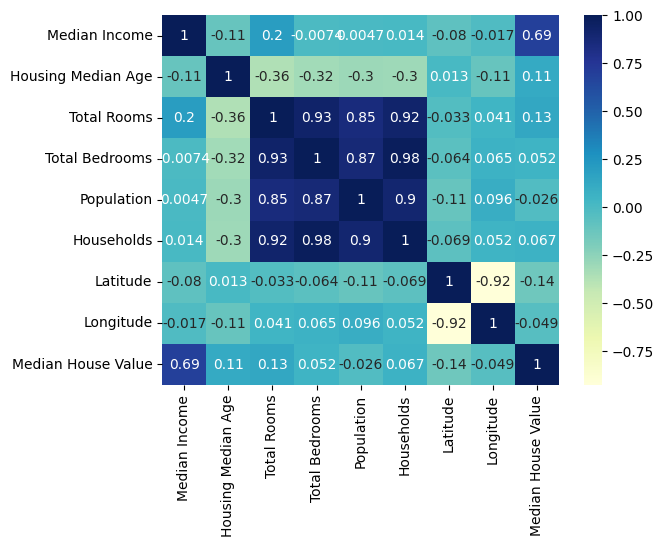

In [15]:
# plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Biểu đồ tương quan giá nhà với tọa độ

<Axes: xlabel='Latitude', ylabel='Longitude'>

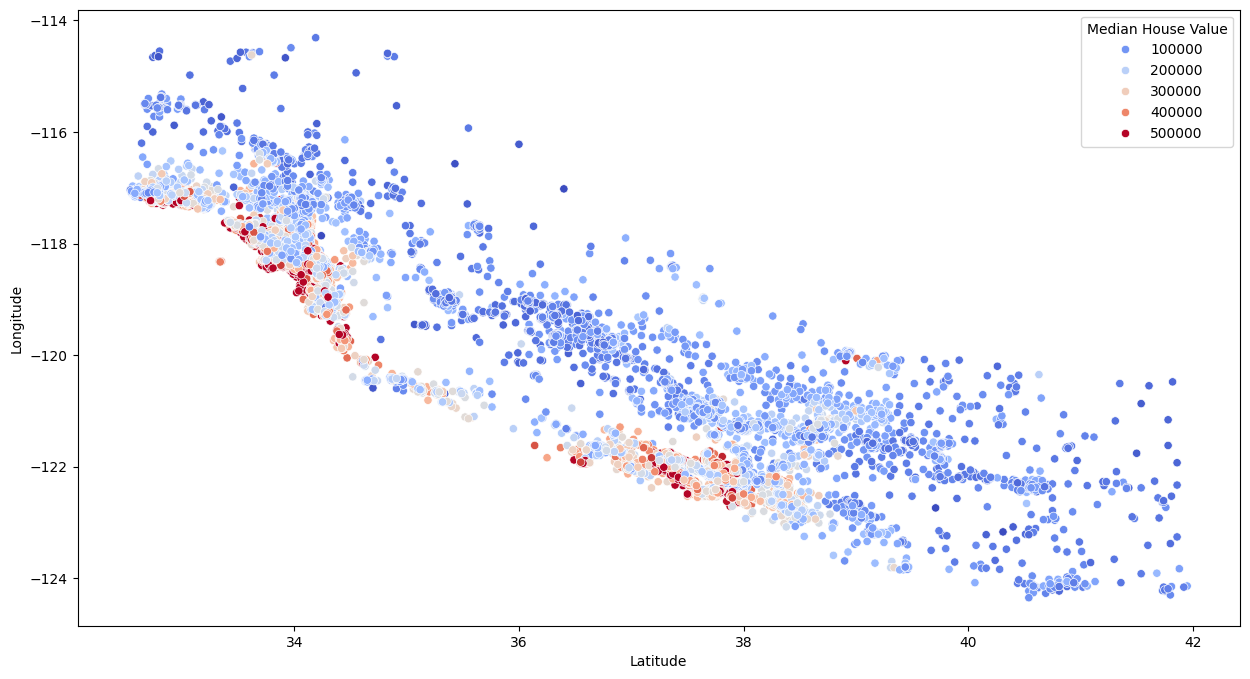

In [16]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Latitude', y='Longitude', data=train_data, hue='Median House Value', palette='coolwarm')

# **Chuẩn hóa dữ liệu**

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [18]:
pd.DataFrame(X_train_scaler)

,0,1,2,3,4,5,6,7
0,-1.055652,-0.293331,0.208054,0.433421,0.965107,0.546717,1.350427,-0.913610
1,1.463657,-0.928250,-0.752991,-0.917672,-0.971188,-0.890179,1.392565,-0.863783
2,0.482351,-0.769521,-0.235082,-0.466516,-0.166221,-0.382423,-1.299547,1.293704
3,0.332355,0.420953,-0.406189,-0.578118,-0.547705,-0.536843,-1.322956,1.213981
4,1.450464,1.214602,-0.287377,-0.592365,-0.441835,-0.502819,-0.709623,0.765543
...,...,...,...,...,...,...,...,...
16507,-0.200182,-0.928250,1.141575,2.390014,1.347466,2.198231,-0.906264,0.845265
16508,-0.652396,0.024129,-0.361233,-0.017735,1.006230,0.075604,-0.779852,0.715716
16509,-0.323898,-0.769521,-0.074525,-0.252811,-0.337714,-0.191360,0.208036,0.272261
16510,-1.019995,0.341588,-0.224990,-0.117464,0.267761,0.025875,-0.016697,0.117799


# **Biểu đồ phân phối của các biến trong dữ liệu huấn luyện đã được chuẩn hóa**

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

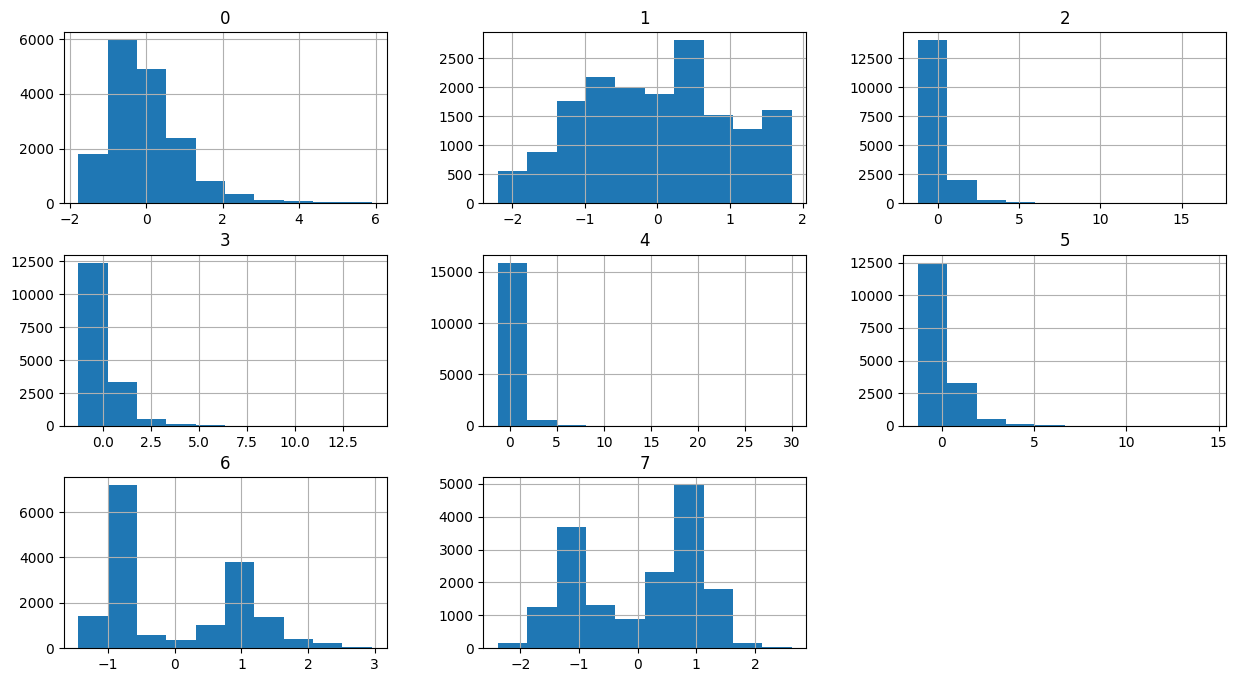

In [19]:
pd.DataFrame(X_train_scaler).hist(figsize=(15, 8))

# ***HUẤN LUYỆN MÔ HÌNH***

# **Mô hình hồi quy tuyến tính**

In [25]:
%%time
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaler, y_train)

CPU times: user 9.03 ms, sys: 86 µs, total: 9.12 ms
Wall time: 8.4 ms


LinearRegression()

# **Đánh giá mô hình hồi quy tuyến tính**

In [40]:
from math import sqrt

lm_train_pred = lm.predict(X_train_scaler)
lm_test_pred = lm.predict(X_test_scaler)

lm_train_mae = mae(y_train, lm_train_pred)
lm_train_mse = mse(y_train, lm_train_pred)
lm_train_rmse = sqrt(lm_train_mse)

lm_test_mae = mae(y_test, lm_test_pred)
lm_test_mse = mse(y_test, lm_test_pred)
lm_test_rmse = sqrt(lm_test_mse)

print("Linear Regression trên dữ liệu train:")
print(f"MAE: {lm_train_mae:.2f}")
print(f"MSE: {lm_train_mse:.2f}")
print(f"RMAE: {lm_train_rmse:.2f}")
print("\nLinear Regression trên dữ liệu test:")
print(f"MAE: {lm_test_mae:.2f}")
print(f"MSE: {lm_test_mse:.2f}")
print(f"RMSE: {lm_test_rmse:.2f}")

Linear Regression trên dữ liệu train:
MAE: 50663.88
MSE: 4809719107.11
RMAE: 69352.14

Linear Regression trên dữ liệu test:
MAE: 51365.46
MSE: 4926336412.07
RMSE: 70187.87


# **Mô hình KNN**

In [41]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn_test = KNeighborsRegressor()
# p=1: manhattan
# p=2: euclidean
param_grid = {'n_neighbors': list(range(1, 21)), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=knn_test, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình trên tập huấn luyện với GridSearchCV
grid_search.fit(X_train_scaler, y_train)

# In ra bộ tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
CPU times: user 1.93 s, sys: 317 ms, total: 2.24 s
Wall time: 1min 13s


# **Đánh giá mô hình KNN**

In [42]:
knn = grid_search.best_estimator_

In [44]:


knn_train_pred = knn.predict(X_train_scaler)
knn_test_pred = knn.predict(X_test_scaler)


knn_train_mae = mae(y_train, knn_train_pred)
knn_train_mse = mse(y_train, knn_train_pred)
knn_train_rmse = sqrt(knn_train_mse)

knn_test_mae = mae(y_test, knn_test_pred)
knn_test_mse = mse(y_test, knn_test_pred)
knn_test_rmse = sqrt(knn_test_mse)

print("KNN trên dữ liệu train:")
print(f"MAE: {knn_train_mae:.2f}")
print(f"MSE: {knn_train_mse:.2f}")
print(f"RMAE: {knn_train_rmse:.2f}")
print("\nnKNN trên dữ liệu test:")
print(f"MAE: {knn_test_mae:.2f}")
print(f"MSE: {knn_test_mse:.2f}")
print(f"RMSE: {knn_test_rmse:.2f}")

KNN trên dữ liệu train:
MAE: 0.00
MSE: 0.00
RMAE: 0.00

nKNN trên dữ liệu test:
MAE: 40578.85
MSE: 3459231915.93
RMSE: 58815.24


# **Decision Tree**

In [29]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt_test = DecisionTreeRegressor()

# Định nghĩa các tham số cần tối ưu hóa
param_grid = {'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=dt_test, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình trên tập huấn luyện với GridSearchCV
grid_search.fit(X_train_scaler, y_train)

# In ra bộ tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
CPU times: user 1.42 s, sys: 184 ms, total: 1.61 s
Wall time: 35.2 s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


# **Đánh giá mô hình Decision Tree**

In [30]:
dt = grid_search.best_estimator_

In [45]:
dt_train_pred = dt.predict(X_train_scaler)
dt_test_pred = dt.predict(X_test_scaler)


dt_train_mae = mae(y_train, dt_train_pred)
dt_train_mse = mse(y_train, dt_train_pred)
dt_train_rmse = sqrt(dt_train_mse)

dt_test_mae = mae(y_test, dt_test_pred)
dt_test_mse = mse(y_test, dt_test_pred)
dt_test_rmse = sqrt(dt_test_mse)

print("Decision trên dữ liệu train:")
print(f"MAE: {dt_train_mae:.2f}")
print(f"MSE: {dt_train_mse:.2f}")
print(f"RMAE: {dt_train_rmse:.2f}")
print("\nDecision trên dữ liệu test:")
print(f"MAE: {dt_test_mae:.2f}")
print(f"MSE: {dt_test_mse:.2f}")
print(f"RMSE: {dt_test_rmse:.2f}")

Decision trên dữ liệu train:
MAE: 35063.66
MSE: 2674445097.61
RMAE: 51715.04

Decision trên dữ liệu test:
MAE: 42758.73
MSE: 4059938620.01
RMSE: 63717.65


# **Mô hình Random Forest**

In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor

rfr_test = RandomForestRegressor()

# Định nghĩa các tham số cần tối ưu hóa
param_grid = {'n_estimators': [100, 200],
              'max_depth': [None,10, 15],
              'min_samples_split': [10],
              'min_samples_leaf': [4],
              'max_features': ['auto']}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=rfr_test, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình trên tập huấn luyện với GridSearchCV
grid_search.fit(X_train_scaler, y_train)

# In ra bộ tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
CPU times: user 23 s, sys: 491 ms, total: 23.5 s
Wall time: 4min 47s


# **Đánh giá hiệu suất mô hình Random Forest**

In [34]:
rfr = grid_search.best_estimator_

In [46]:
rfr_train_pred = rfr.predict(X_train_scaler)
rfr_test_pred = rfr.predict(X_test_scaler)


rfr_train_mae = mae(y_train, rfr_train_pred)
rfr_train_mse = mse(y_train, rfr_train_pred)
rfr_train_rmse = sqrt(rfr_train_mse)

rfr_test_mae = mae(y_test, rfr_test_pred)
rfr_test_mse = mse(y_test, rfr_test_pred)
rfr_test_rmse = sqrt(rfr_test_mse)

print("Random Forest trên dữ liệu train:")
print(f"MAE: {rfr_train_mae:.2f}")
print(f"MSE: {rfr_train_mse:.2f}")
print(f"RMAE: {rfr_train_rmse:.2f}")
print("\nRandom Forest trên dữ liệu test:")
print(f"MAE: {rfr_test_mae:.2f}")
print(f"MSE: {rfr_test_mse:.2f}")
print(f"RMSE: {rfr_test_rmse:.2f}")

Random Forest trên dữ liệu train:
MAE: 20715.79
MSE: 1091911684.92
RMAE: 33044.09

Random Forest trên dữ liệu test:
MAE: 31672.64
MSE: 2347372980.81
RMSE: 48449.70


# **Mô hình Gradient Boosting Regressor**

In [37]:
%%time
from sklearn.ensemble import GradientBoostingRegressor


# Định nghĩa mô hình Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Định nghĩa các tham số cần tối ưu hóa
param_grid = {'n_estimators': [100, 300],
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7]}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình trên tập huấn luyện với GridSearchCV
grid_search.fit(X_train_scaler, y_train)

# In ra bộ tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
CPU times: user 36.7 s, sys: 946 ms, total: 37.6 s
Wall time: 7min 59s


# **Đánh giá mô hình Gradient Boosting Regressor**

In [38]:
gb_regressor = grid_search.best_estimator_

In [47]:
gb_regressor_train_pred = gb_regressor.predict(X_train_scaler)
gb_regressor_test_pred = gb_regressor.predict(X_test_scaler)


gb_regressor_train_mae = mae(y_train, gb_regressor_train_pred)
gb_regressor_train_mse = mse(y_train, gb_regressor_train_pred)
gb_regressor_train_rmse = sqrt(gb_regressor_train_mse)

gb_regressor_test_mae = mae(y_test, gb_regressor_test_pred)
gb_regressor_test_mse = mse(y_test, gb_regressor_test_pred)
gb_regressor_test_rmse = sqrt(gb_regressor_test_mse)

print("Gradient Boosting Regressor trên dữ liệu train:")
print(f"MAE: {gb_regressor_train_mae:.2f}")
print(f"MSE: {gb_regressor_train_mse:.2f}")
print(f"RMAE: {gb_regressor_train_rmse:.2f}")
print("\nGradient Boosting Regressor trên dữ liệu test:")
print(f"MAE: {gb_regressor_test_mae:.2f}")
print(f"MSE: {gb_regressor_test_mse:.2f}")
print(f"RMSE: {gb_regressor_test_rmse:.2f}")

Gradient Boosting Regressor trên dữ liệu train:
MAE: 15478.87
MSE: 455832449.37
RMAE: 21350.23

Gradient Boosting Regressor trên dữ liệu test:
MAE: 30298.27
MSE: 2168717799.28
RMSE: 46569.49


# **Mô hình SVM (SVR)**

In [49]:
%%time
from sklearn.svm import SVR


svr_test = SVR()

# Định nghĩa các tham số cần tối ưu hóa
param_grid = {'kernel': ['rbf'],
              'C': [10000, 100000, 1000000],
              'gamma': [0.01, 0.001, 0.0001]}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=svr_test, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình trên tập huấn luyện với GridSearchCV
grid_search.fit(X_train_scaler, y_train)

# In ra bộ tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1000000, 'gamma': 0.01, 'kernel': 'rbf'}
CPU times: user 24.2 s, sys: 1.42 s, total: 25.6 s
Wall time: 10min 8s


# **Đánh giá mô hình SVR**

In [50]:
svr_model = grid_search.best_estimator_

In [51]:
svr_model_train_pred = svr_model.predict(X_train_scaler)
svr_model_test_pred = svr_model.predict(X_test_scaler)


svr_model_train_mae = mae(y_train, svr_model_train_pred)
svr_model_train_mse = mse(y_train, svr_model_train_pred)
svr_model_train_rmse = sqrt(svr_model_train_mse)

svr_model_test_mae = mae(y_test, svr_model_test_pred)
svr_model_test_mse = mse(y_test, svr_model_test_pred)
svr_model_test_rmse = sqrt(svr_model_test_mse)

print("SVR trên dữ liệu train:")
print(f"MAE: {svr_model_train_mae:.2f}")
print(f"MSE: {svr_model_train_mse:.2f}")
print(f"RMAE: {svr_model_train_rmse:.2f}")
print("\nnSVR trên dữ liệu test:")
print(f"MAE: {svr_model_test_mae:.2f}")
print(f"MSE: {svr_model_test_mse:.2f}")
print(f"RMSE: {svr_model_test_rmse:.2f}")

SVR trên dữ liệu train:
MAE: 41605.88
MSE: 3705265324.68
RMAE: 60870.89

nSVR trên dữ liệu test:
MAE: 42896.78
MSE: 3903756773.57
RMSE: 62480.05


# **LƯU MÔ HÌNH**

In [52]:
import joblib

joblib.dump(lm , 'lm.h5')
joblib.dump(knn , 'knn.h5')
joblib.dump(dt , 'dt.h5')
joblib.dump(rfr , 'rfr.h5')
joblib.dump(gb_regressor , 'gb_regressor.h5')
joblib.dump(svr_model , 'svr_model.h5')

['svr_model.h5']